# WINTER PREDICTOR
Uses the "winter_predictor" oriented-object modules

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from winter_predictor import Predictor, StationPrediction

In [2]:
import numpy as np

# PART 1 : GET PREDICTORS

The **SAME** predictor set will then be used for any target station to predict.

In [3]:
PRED = Predictor()

In [4]:
PRED.getPredictorsDF()

In [5]:
PRED.X_df.head()

,PC1_z70_9,PC2_z70_9,PC3_z70_9,PC1_ci_9,PC2_ci_9,PC3_ci_9,PC1_sst_9,PC2_sst_9,PC3_sst_9,PC1_sstna_9,...,PC1_ci_10,PC2_ci_10,PC3_ci_10,PC1_sst_10,PC2_sst_10,PC3_sst_10,PC1_sstna_10,PC2_sstna_10,PC3_sstna_10,Nino_10
0,18023.465139,2794.736512,-2092.985110,2.963272,1.071405,1.375207,5.315733,5.144089,-0.099973,6.234057,...,2.152409,0.879814,-0.169656,6.340731,3.405809,3.130883,1.479563,-6.115408,5.599430,-0.224291
1,-5422.104718,9689.567172,5922.630486,0.101697,0.728209,0.115514,-3.156064,0.330494,-3.889681,1.292388,...,0.352610,0.479755,-0.325368,-4.666931,3.319608,-0.769363,0.501719,-5.743499,5.634341,0.163475
2,19744.941093,-8460.604205,1635.209243,-0.538567,1.527358,-1.105497,-4.273700,2.978422,-4.129621,6.777093,...,0.624417,0.928141,-0.169305,-5.718029,3.198880,-6.355418,7.601765,-1.296932,5.296678,0.101910
3,-14530.470578,8700.189280,-4888.437956,-0.840921,1.564609,-0.486813,19.597934,7.319080,-4.275853,-4.006121,...,-1.098517,1.081055,0.334791,27.178280,9.416241,2.033550,-8.193469,-1.592259,-6.993826,-1.708226
4,-5774.518779,2361.237107,13897.025591,0.980549,0.753570,0.899546,2.394603,-2.069867,19.713857,-8.751639,...,1.588659,-0.114060,0.513703,-3.563558,-3.382147,18.223530,-5.606292,0.579888,-1.639823,0.772114


In [6]:
PRED.X_df.columns

Index(['PC1_z70_9', 'PC2_z70_9', 'PC3_z70_9', 'PC1_ci_9', 'PC2_ci_9',
       'PC3_ci_9', 'PC1_sst_9', 'PC2_sst_9', 'PC3_sst_9', 'PC1_sstna_9',
       'PC2_sstna_9', 'PC3_sstna_9', 'wyear', 'Nino_9', 'PC1_z70_10',
       'PC2_z70_10', 'PC3_z70_10', 'PC1_ci_10', 'PC2_ci_10', 'PC3_ci_10',
       'PC1_sst_10', 'PC2_sst_10', 'PC3_sst_10', 'PC1_sstna_10',
       'PC2_sstna_10', 'PC3_sstna_10', 'Nino_10'],
      dtype='object')

# PART 2 : GET STATION DATA

In [7]:
# Which Station id ?
import pymongo
import pandas as pd
mongo_host_local = 'mongodb://localhost:27017/'
mg = pymongo.MongoClient(mongo_host_local)
db = mg.GHCN

this_country = 'SWITZERLAND'

db.stations.distinct('country')
sta_df = pd.DataFrame(list(db.stations.find(filter={'country': this_country})))
sta_df.head()

,_id,country,country_id,elev,landcover,loc,name,popclass,station_id,wmo_id
0,5abe7d8823c8cceb0c3f9563,SWITZERLAND,646,491.0,WARM FOR./FIELD,"{'type': 'Point', 'coordinates': [6.95, 46.82]}",PAYERNE,B,64606610000,6610
1,5abe7d8823c8cceb0c3f9565,SWITZERLAND,646,-999.0,WARM CROPS,"{'type': 'Point', 'coordinates': [7.4, 47.0]}",BERN SWITZERLAN,B,64606630001,6630
2,5abe7d8823c8cceb0c3f9567,SWITZERLAND,646,318.0,COOL CROPS,"{'type': 'Point', 'coordinates': [7.6, 47.6]}",BASEL/BINNINGEN SWITZERLAN,C,64606642001,6642
3,5abe7d8823c8cceb0c3f9569,SWITZERLAND,646,569.0,WARM MIXED,"{'type': 'Point', 'coordinates': [8.57, 47.38]}",ZURICH (TOWN/,C,64606660000,6660
4,5abe7d8823c8cceb0c3f956b,SWITZERLAND,646,2500.0,WARM CROPS,"{'type': 'Point', 'coordinates': [9.35, 47.25]}",SAENTIS,A,64606680000,6680


In [8]:
STA = StationPrediction(station_id=64606660000, 
                        target_months=['12', '1'],
                        X_df=PRED.X_df)

In [9]:
STA.station_name

'ZURICH (TOWN/'

In [10]:
STA.metadata

{'_id': ObjectId('5abe7d8823c8cceb0c3f9569'),
 'country': 'SWITZERLAND',
 'country_id': 646,
 'elev': 569.0,
 'landcover': 'WARM MIXED',
 'loc': {'coordinates': [8.57, 47.38], 'type': 'Point'},
 'name': 'ZURICH (TOWN/',
 'popclass': 'C',
 'station_id': 64606660000,
 'wmo_id': 6660}

In [11]:
STA.queryData()
STA.data_df.tail()

,wyear,64606660000
34,2014,2.40
35,2015,2.50
36,2016,3.60
37,2017,-1.15
38,2018,3.05


In [12]:
STA.getAnomalies()
STA.anom_df.tail()

,wyear,x,xbar,anom
34,2014,2.40,1.512753,0.887247
35,2015,2.50,1.540526,0.959474
36,2016,3.60,1.568300,2.031700
37,2017,-1.15,1.596073,-2.746073
38,2018,3.05,1.623846,1.426154


# PART 3 : FIT ANOMALIES

In [13]:
STA.fitAnomalies(X_df=PRED.X_df)

In [14]:
res = dict({'R2': STA.R2, 
            'nyears_used': STA.nyears_used})
print(res)

{'R2': 0.15120476999806587, 'nyears_used': 38}


In [15]:
STA.importance_df

,coef,pred,absCoef
0,-0.096421,PC1_z70_9,0.096421
1,-0.012355,PC2_z70_10,0.012355
2,-0.174527,PC1_ci_10,0.174527
3,0.206829,PC1_sst_10,0.206829


# PART 4 : PREDICT FUTURE ANOMALIES

In [16]:
wyear_new = 2017
newX_df = PRED.X_df.query('wyear==@wyear_new') # for instance
STA.predictFutureAnomalies(newX_df)
pred_anomaly = STA.predictedAnomaly # array([-0.03753036])
pred_anomaly

array([-0.03753036])

# PART 5 : EXTREME ANOMALY ?

In [17]:
# Long-term trend
ltt = STA.detrend_fit
ltt_fit = ltt.predict(2017)
ltt_fit

array([[ 1.59607287]])

In [18]:
# Predicted wyear value :
T_pred = pred_anomaly + ltt_fit
T_pred

array([[ 1.55854251]])

In [19]:
# Anomaly as defined by SwissRe :
SwissRe_df = STA.anom_df.tail(10) # take only the last 10 years
SwissRe_ltt = np.nanmean(SwissRe_df.x.values)
SwissRe_anom = T_pred-SwissRe_ltt
SwissRe_anom

array([[ 0.19854251]])

In [20]:
SwissRe_df = SwissRe_df.assign(anom_SwissRe=SwissRe_df.x-SwissRe_ltt)
SwissRe_df

,wyear,x,xbar,anom,anom_SwissRe
29,2009,-0.70,1.373887,-2.073887,-2.06
30,2010,-0.40,1.401660,-1.801660,-1.76
31,2011,0.20,1.429433,-1.229433,-1.16
32,2012,2.80,1.457206,1.342794,1.44
33,2013,1.30,1.484980,-0.184980,-0.06
34,2014,2.40,1.512753,0.887247,1.04
35,2015,2.50,1.540526,0.959474,1.14
36,2016,3.60,1.568300,2.031700,2.24
37,2017,-1.15,1.596073,-2.746073,-2.51
38,2018,3.05,1.623846,1.426154,1.69


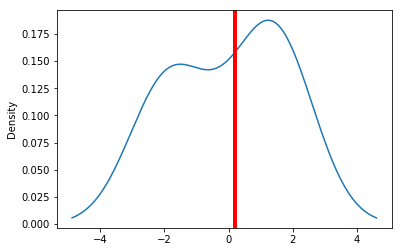

In [23]:
# Fit Normal distribution
from scipy.stats import norm
mu, std = norm.fit(SwissRe_df.anom_SwissRe)
SwissRe_df['anom_SwissRe'].plot.density()
plt.axvline(SwissRe_anom,linewidth=4, color='r')

In [26]:
quantl = norm.cdf(0, loc=SwissRe_anom, scale=std).ravel()
quantl

array([ 0.45219341])